In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train3.csv", index_col = 0)
df.head(2)

,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,,,,,,,,,,,,,,,,,,,,,
0.30,62.4,58.0,4.31,4.28,2.68,6.353,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1.01,62.7,56.0,6.42,6.46,4.04,9.183,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


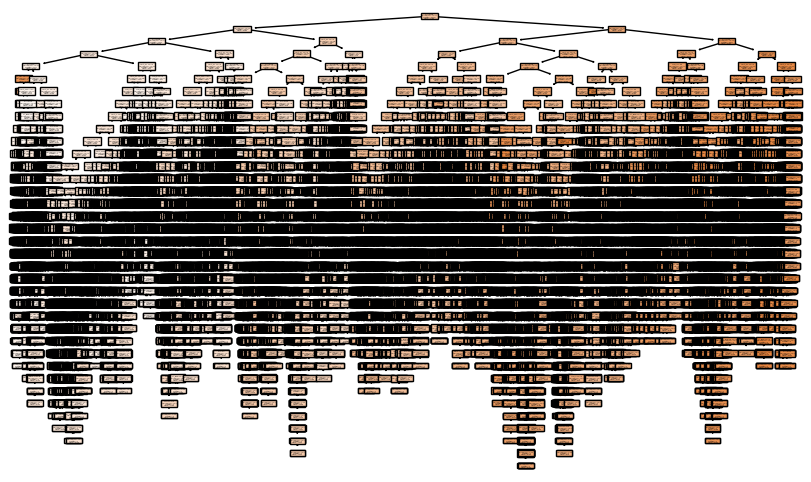

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.0

In [9]:
# max depth

print(regressor.tree_.max_depth)

36


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.091319,0.018601,0.136387,0.981786,test,Decission Tree I
1,0.000224,0.000017,0.004178,0.999983,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.282, test=-0.273) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.881, test=-0.888) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.814, test=-0.811) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.212, test=-0.217) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.962, test=-0.951) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.400, test=-0.374) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.754, test=-0.752) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=1, min_samples_split=10;,

[CV 1/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.238, test=-0.240) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.187, test=-0.188) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.145, test=-0.143) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.261, test=-0.266) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.916, test=-0.913) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.606, test=-0.602) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.878, test=-0.878) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.135, test=-0.135) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_s

[CV 10/10] END max_depth=4, max_features=5, min_samples_split=50;, score=(train=-0.169, test=-0.170) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.894, test=-0.891) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.154, test=-0.161) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.068, test=-0.069) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.201, test=-0.199) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.196, test=-0.196) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.153, test=-0.150) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.261, test=-0.268) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 6/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.320, test=-0.323) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.120, test=-0.127) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.151, test=-0.158) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.712, test=-0.688) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.188, test=-0.193) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.508, test=-0.524) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.940, test=-0.955) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.138, test=-0.140) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_

[CV 9/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.152, test=-0.148) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.224, test=-0.221) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.078, test=-0.080) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.637, test=-0.636) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.220, test=-0.230) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.164, test=-0.161) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.252, test=-0.251) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.336, test=-0.350) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4

[CV 9/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.085, test=-0.089) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.596, test=-0.594) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.675, test=-0.678) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.704, test=-0.701) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.730, test=-0.745) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.861, test=-0.880) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.793, test=-0.792) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.633, test=-0.614) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, mi

[CV 1/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.283, test=-0.279) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.370, test=-0.376) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.355, test=-0.353) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.724, test=-0.758) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.177, test=-0.173) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.085, test=-0.084) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.142, test=-0.158) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.192, test=-0.196) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_s

[CV 10/10] END max_depth=6, max_features=5, min_samples_split=50;, score=(train=-0.057, test=-0.061) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.059) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.061) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.066, test=-0.066) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.175, test=-0.180) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.058, test=-0.059) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.055, test=-0.057) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.078, test=-0.089) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=

[CV 10/10] END max_depth=7, max_features=1, min_samples_split=100;, score=(train=-0.548, test=-0.527) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.076, test=-0.076) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.066, test=-0.068) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.276, test=-0.287) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.153, test=-0.156) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.740, test=-0.720) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.577, test=-0.593) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.178, test=-0.192) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min

[CV 1/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.199, test=-0.197) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.055, test=-0.054) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.250, test=-0.255) total time=   0.1s
[CV 4/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.062, test=-0.065) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.350, test=-0.338) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.073, test=-0.071) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.109, test=-0.114) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.055, test=-0.058) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=4, min_s

[CV 4/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.059, test=-0.061) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.049, test=-0.049) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.052, test=-0.053) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.047, test=-0.050) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.063, test=-0.068) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.050, test=-0.050) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.048, test=-0.054) total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

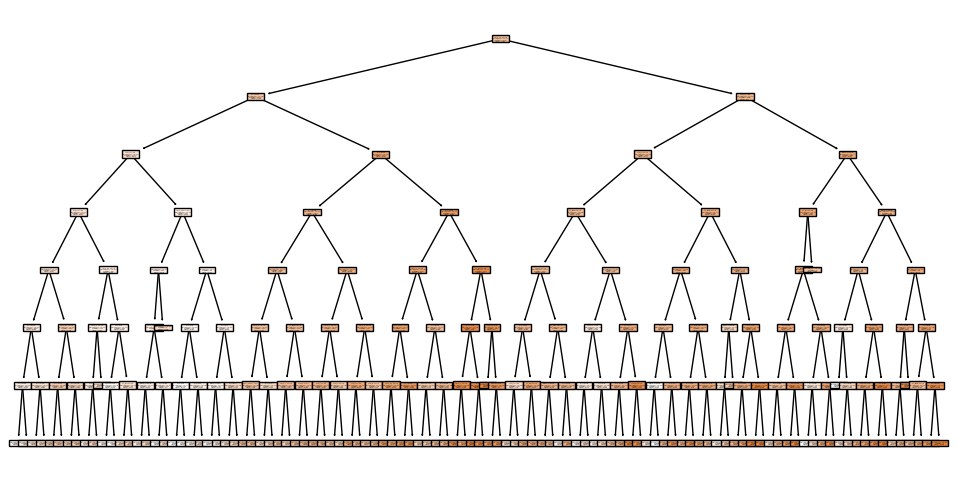

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- clarity_SI2 <= 0.50
|   |--- y <= 5.58
|   |   |--- color_J <= 0.50
|   |   |   |--- color_I <= 0.50
|   |   |   |   |--- x <= 4.93
|   |   |   |   |   |--- x <= 4.55
|   |   |   |   |   |   |--- x <= 4.27
|   |   |   |   |   |   |   |--- value: [6.31]
|   |   |   |   |   |   |--- x >  4.27
|   |   |   |   |   |   |   |--- value: [6.60]
|   |   |   |   |   |--- x >  4.55
|   |   |   |   |   |   |--- x <= 4.72
|   |   |   |   |   |   |   |--- value: [6.78]
|   |   |   |   |   |   |--- x >  4.72
|   |   |   |   |   |   |   |--- value: [6.93]
|   |   |   |   |--- x >  4.93
|   |   |   |   |   |--- clarity_SI1 <= 0.50
|   |   |   |   |   |   |--- y <= 5.17
|   |   |   |   |   |   |   |--- value: [7.42]
|   |   |   |   |   |   |--- y >  5.17
|   |   |   |   |   |   |   |--- value: [7.58]
|   |   |   |   |   |--- clarity_SI1 >  0.50
|   |   |   |   |   |   |--- y <= 5.43
|   |   |   |   |   |   |   |--- value: [7.25]
|   |   |   |   |   |   |--- y >  5.43
|   |   |   |   |   |   |   |--

In [19]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [20]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [21]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.203429,0.083256,0.288541,0.918477,test,Decision tree II
1,0.203232,0.084615,0.290886,0.918408,train,Decision tree II


# prueba predicciones 

In [22]:
df = pd.read_csv("test3.csv", index_col = 0)
X_realida = df


In [23]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.20031111, 8.55897078, 9.32392501, ..., 6.60020159, 8.55897078,
       7.95272744])

In [24]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.200311
1,1,8.558971
2,2,9.323925
3,3,7.054584
4,4,8.376563
...,...,...
13480,13480,8.558971
13481,13481,8.346796
13482,13482,6.600202
13483,13483,8.558971


In [25]:
submision1.to_csv("df_submision3.csv", index=False)